# Variations of martingale strategies

This is a notebook studying martingale betting strategies, using analytical and numerical (i.e., simulations) methods to find various probabilities or expected values associated with different strategies.

We vary the objective (winning *x* target dollars, play *n* number of times, play until you lose *y* amount of dollars, etc.) or the strategy (stop after losing 5 times, vary bet size after consecutive losses, etc.) and see how each factor influencess our overall EV of the strategy.

## Game 1: What is the probability of winning 10,000 USD using a martingale strategy?
Suppose you start with 10000 USD and want to know the probability of reaching 20000 USD.

You intuit using the martingale strategy, you have a high probability of winning under following assumptions:
- You start with 1 dollar bet and double each time you lose (reset bet to 1 dollar after winning a bet)
- Probability of win is 0.5

### Variation 1: Stop when you can't double your bet
Our strategy is to stop after becoming unable to double your bet size. 

#### Analytical Solution
Now, if we define an event to be winning 1 dollar given starting equity of x as $E_x$ the probabability, or $Pr(E_x)$ is equivalent to finding 1 minus the probability of stopping due to insufficient equity. This is because there are only two end points: we either win 1 dollar or end up with insufficient equity. Hence, since there are many different paths in how we can reach 1 dollar of profit (win first bet, lose two then win third, lose five, win sixth...), it is easier to find the probability of the other extreme and subtracting that from 1.

##### Finding k+1, the number of maximum bets before stopping
If we were to lose a series of bet, our cumulative loss series would look something like this: $$-(1 + 2+ 4 + 8 + 16 + 32 + ...)$$

Thus, the sum within the paranthesis is a geometric series with *a = 1 and r = 2.* Then, the formula for the sum is given by: $$\sum_{i=0}^{k}2^i = a \ \times \ \frac{r^{k+1}-1}{r-1} = 2^{k+1} -1$$

Thus, we want to find the *maximum* of k such that it satisfies the below inequality.
$$2^{k+1} -1 \leq 10,000 \implies 2^{k+1} \leq 10,001 \implies log_22^{k+1} \leq log_210,001 \implies k+1 \leq log_210,001 \implies k \leq log_210,001 -1$$

This evaluates to **k is less than 12.28**. Thus, we can make k + 1 = 12 + 1 = 13 bets before we run out of money. To verify our math, we use python to calculate the series


In [1]:
# Import necessary dependencies
import numpy as np
import pandas as pd
import math

In [2]:
## Calculate k

# Initialize variables
m = 0 # Initial game
cum_profit = m # After winning m games, you gain m dollars 
target_value = 10001 + m # starting_equity + 1 + m dollars

k_plus_one = math.log2(target_value)
k = k_plus_one - 1

print(f"The value of k is: {k:.2f}")
print(f"The maximum number of bets (k + 1) is: {math.floor(k) + 1}")


The value of k is: 12.29
The maximum number of bets (k + 1) is: 13


In [3]:
## Calculate remaining dollars after 13 bets

# Initialize loss sequence
starting_equity = 10000
loss_seq = []

for i in np.arange(13):
  value = 2**i
  loss_seq.append(value)

print(loss_seq)
total_loss = sum(loss_seq)
remaining_equity = starting_equity - total_loss

print(f"total_loss: {total_loss}\nremaining equity: {remaining_equity}")

[np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64), np.int64(128), np.int64(256), np.int64(512), np.int64(1024), np.int64(2048), np.int64(4096)]
total_loss: 8191
remaining equity: 1809


As we have expected, the results show that after losing 13 bets consecutively, we end up with $1809 and we are unable to proceed under our initial assumption.

Now, this is the case if we start with 10000. Notice that after we win a "game" and end up with a profit of 1 dollar, our next starting equity will be 10,001. Then, the previous analysis applies and so we can afford to lose 13 bets. Using similar logic, we will be able to afford losing 13 bets as long as our starting equity is below 8192 + 8191 = 16383 USD. That is, if f(x) is a function returning the number of maximum bets given the input is the starting equity, then f(x) = 13 for all x in the interval [10,000 , 16382] and f(x) = 14 is for all x in the [16383 , 20000].

Using this fact, we can analytically calculate the probability of the gambler reaching 20,000 in equity before "losing" a game.

First, notice that the probability of losing a single game is equivalent to losing 13 bets in a row. Thus, probability of the even where gambler ends up winning is $$1-Pr(losing \ 13 \ bets \ in \ a \ row) = 1 - 0.5^{13}$$.

Then, the gambler will continue to play the game with the same assumptions and rules until he reaches an equity of 16383, and mind you that he cannot lose a single game. That is,

 $$\begin{align}
&Pr(E_x) = 1 - 0.5^{13} \\
&\text{for all} \ x \in [10000, 16382]
\end{align}$$


Therefore, for him to reach equity of 16383 from 10000, the probability is given by:
$$Pr(E_x)^{6383} = (1-0.5^{13})^{6383}$$

Next, as mentioned in our discussion above, the number of maximum bets affordable from starting equity of 16383 to 19999 is 14 (we stop when x=20000). That is,

 $$\begin{align}
&Pr(E_x) = 1 - 0.5^{14} \\
&\text{for all} \ x \in [16383, 19999]
\end{align}$$

 Therefore, the probability of reaching 20000 from 16383 is given by:
$$(1-0.5^{14})^{3617}$$

Then, the probability of reaching 20000 from 10000 of starting equity is simply the multiplication of the two terms.

$$(1-0.5^{13})^{6383} \times (1-0.5^{14})^{3617}$$

We calculate this in Python.


In [4]:
a = (1-0.5**13)**6383
b = (1-0.5**14)**3627
pr_reach_20000 = a*b
print(pr_reach_20000)

0.3676574438548646


That is, there is approximately 37% chance of reaching 20,000 before stopping. Unlike what people go on about *gambler's fallacy* or *gambler's ruin*, this doesn't seem like a too bad of a deal, does it?

Well, to be sure, we must find the *expected value* of the strategy, not just its probability. A high probability strategy could be deceiving because naturally people are more comfortable with the fact that they are "winning more often". However, what's important in a continuous betting environment is the average payoff per game; in finance, we often refer to this as the *risk-reward* payoff. 

##### Finding expected value of varation 1
To answer this question, we first define all possible outcomes. 

This is quite straightforward, we either lose the game (unable to increase betting size by 2x), or we win the game (reach equity value of 20000).

Now we must associate a payoff to each outcome. Obviously, the latter is +10000. What about the former? How much do we lose in equity value as a result of losing the game? Well, we have to know what our equity value is when we stop betting. This depends on the amount of starting equity. 

For instance, if we start with 10000 and lose the game, that means we have lost 13 bets in a row, resulting in 1809 of remaining equity. This occurs at a probability of $0.5^{13}$. Then, the associated payoff for this specific outcome, given our starting equity of 10000, is $-sum \ of \ loss \ sequence = -8191$.

What about the associated payoff of a losing outcome, given our starting equity of 10001? Well. the amount we lose in this case does not change as well, since we will stop after 13 bets. Thus, payoff is the same: -8191.

Extending this logic, let us calculate the expected value of the strategy.

In [5]:
## Calculate EV of variation 1

# Generate payoff sequence
target_equity = 20000
expected_payoff_seq = []
expected_remeq_seq = []
count =0

for i in np.arange(target_equity - starting_equity):
  i = i+1
  target_value = starting_equity + i
  k_plus_one = math.log2(target_value)
  k_plus_one = math.floor(k_plus_one)

  loss_seq = []

  for j in np.arange(k_plus_one):
    loss_per_bet = 2**j
    loss_seq.append(loss_per_bet)

  total_loss = sum(loss_seq)

  remaining_equity = starting_equity - total_loss
  expected_remeq = remaining_equity * 0.5**k_plus_one
  expected_remeq_seq.append(expected_remeq)

  expected_payoff = -total_loss * 0.5**k_plus_one
  expected_payoff_seq.append(expected_payoff)

# Calculate expected payoff of winning game
a = (1-0.5**13)**6383
b = (1-0.5**14)**3627

pr_reach_20000 = a*b

expected_payoff_win = pr_reach_20000 * 10000
expected_equity_win = pr_reach_20000 * 20000

# Expected value of payoff
expected_payoff_seq.append(expected_payoff_win)
total_ev_payoff = sum(expected_payoff_seq)

# Calculated expected value of equity
expected_remeq_seq.append(expected_equity_win)
total_ev_equity = sum(expected_remeq_seq)
  
print(f"EV of payoff: {total_ev_payoff}\nEV of equity: {total_ev_equity}")

EV of payoff: -6322.42562248651
EV of equity: 7353.538464499636



#### Numerical Solution
Now, to verify if above analytical results align with reality, we use simulation method for verficiation.

We import `random` module to determine whether we win each bet or not. Then, we use `tqdm` to track our simulation progress.

We will be finding the probability of winning 10000 by dividing # of success trials by # of total trials.

EV of payoff is calculated by dividing sum of total payoffs by # of total trials.

EV of equity is calculated in a similar manner.

Amount of final capital after each trial is recorded to draw the histogram displaying distribution of final capital amount.

Each capital path evolution is recorded in a list so we can randomly sample 100 paths to visualize the progress of each game (trial).

In [11]:
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

def martingale_simulation(starting_amount, target_amount, trials):
    success_count = 0
    final_capitals = []
    all_paths = [] # store equity path of each trial

    for _ in tqdm(range(trials), desc="Simulating trials"):
        capital = starting_amount
        bet = 1
        path = [capital]
        
        while 0 < capital < target_amount:
            if random.random() < 0.5:  # win
                capital += bet
                bet = 1  # reset bet to 1 after a win
            else:  # lose
                capital -= bet
                bet *= 2  # double the bet after a loss
                if bet > capital:  # if next bet exceeds capital, can't continue
                    break
            path.append(capital)
        
        all_paths.append(path)
        final_capitals.append(capital)
        if capital >= target_amount:
            success_count += 1
    
    # Calculate the probability of success
    prob_success = success_count / trials
    
    # Calculate the expected value of the final capital (equity)
    expected_equity = sum(final_capitals) / trials
    
    # Calculate the expected value of the payoff
    payoffs = [fc - starting_amount for fc in final_capitals]
    expected_payoff = sum(payoffs) / trials
    
    return prob_success, expected_equity, expected_payoff, all_paths, final_capitals

# Parameters
starting_amount = 10000
target_amount = 15000
trials = 10000  # Number of simulation trials

# Run simulation
prob_success, expected_equity, expected_payoff, all_paths, final_capitals = martingale_simulation(starting_amount, target_amount, trials)
print(f"Probability of winning $10,000 using Martingale strategy: {prob_success:.5f}")
print(f"Expected value of final equity: {expected_equity:.2f}")
print(f"Expected value of payoff: {expected_payoff:.2f}")


Simulating trials: 100%|██████████| 10000/10000 [00:15<00:00, 638.18it/s]

Probability of winning $10,000 using Martingale strategy: 0.54200
Expected value of final equity: 9967.58
Expected value of payoff: -32.42


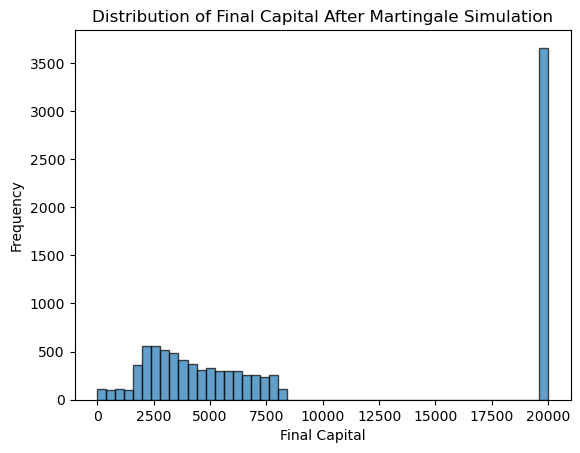

In [7]:
# Plot the distribution of final capitals
plt.hist(final_capitals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Final Capital')
plt.ylabel('Frequency')
plt.title('Distribution of Final Capital After Martingale Simulation')
plt.show()

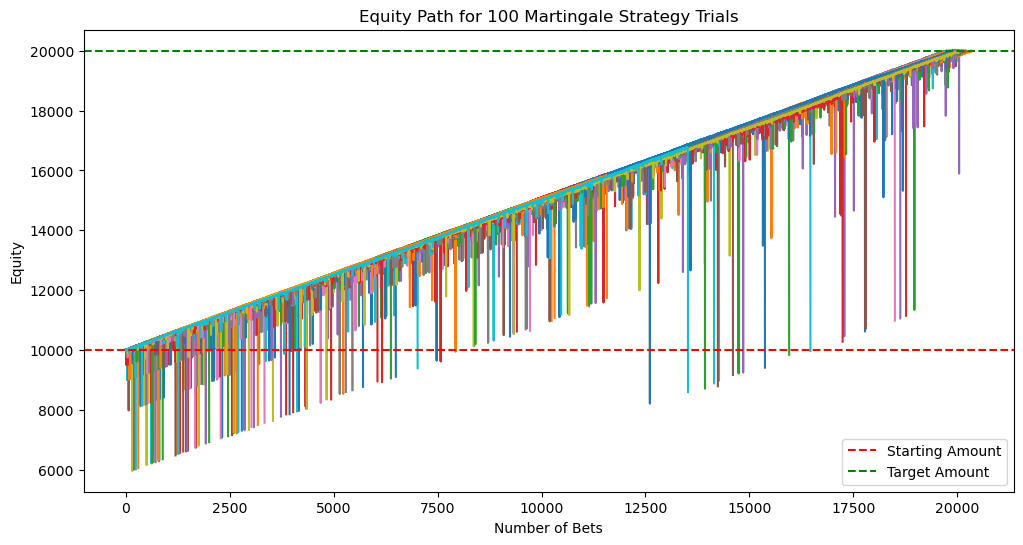

In [9]:
# Plot paths of 100 random sample paths
n = 100 # number of sample
sample_paths = random.sample(all_paths, n)

plt.figure(figsize=(12, 6))
for path in sample_paths:
    plt.plot(path)
plt.axhline(y=starting_amount, color='r', linestyle='--', label='Starting Amount')
plt.axhline(y=target_amount, color='g', linestyle='--', label='Target Amount')
plt.xlabel('Number of Bets')
plt.ylabel('Equity')
plt.title('Equity Path for 100 Martingale Strategy Trials')
plt.legend()
plt.show()

## Game 2: Flip a coin until you get three heads in a row. If it costs 1 dollar a flip, what should be the reward be?

One can model this stochastic process using markov chains. Denote the states as ${0,1,2,3}$ where each state refers to the number of heads in a row that have occurred in time $n$. Then $E_i$ is the expected number of flips required in order to reach state 3 from state i. 

One can then construct a system of linear equations usign recurrence relations.

$$\begin{align}
E_0 &= 1 + \frac{1}{2}E_1 + \frac{1}{2}E_0 \\[5pt]
E_1 &= 1 + \frac{1}{2}E_2 + \frac{1}{2}E_0 \\[5pt]
E_2 &= 1 + \frac{1}{2}E_3 + \frac{1}{2}E_0 \\[5pt]
E_3 &= 0
\end{align}$$

Solving above equation gives us closed form solution of $E_0 = 14$.

We confirm that this number is correct via simulation.


In [9]:
import random

def simulate_game2():
    """
    Simulates the coin flip game where we flip coins until we get 3 heads in a row.
    Returns the total number of flips made.
    """
    consecutive_heads = 0
    total_flips = 0
    
    while consecutive_heads < 3:
        total_flips += 1
        flip = random.choice(['H', 'T'])  # Simulate a coin flip: 'H' for heads, 'T' for tails
        if flip == 'H':
            consecutive_heads += 1
        else:
            consecutive_heads = 0  # Reset if tails

    return total_flips

# Let's simulate the game 10000 times and calculate the average number of flips
random.seed(1998) # set seed
num_simulations = 10000
total_flips_list = [simulate_game2() for _ in range(num_simulations)]

# Calculate the average number of flips
average_flips = sum(total_flips_list) / num_simulations

average_flips


14.0691

Assuming each flip costs \$1, we see that on average a player must pay \$14 before throwing three heads in a row. Thus, the game would be considered fair (EV = 0) if we pay \$14 to a player that throws 3 heads in a row.
